In [40]:
import numpy as np
import pandas as pd
import os

import preprocessing as pp
import model_gen as vae

from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import pyplot as plt

In [47]:
time_step = 288

thresh_dir = 'deploy/'
model_dir = 'deploy/models_' + str(time_step) + '/'
data_path = '/Users/baconbaker/Documents/Studium/ANM/anm-project/data/test_data/host/'

In [48]:
def find_anom(host, dfs):
    dfs['db_oracle_11g'] = dfs.pop('db')
    dfs['dcos_container'] = dfs.pop('container')
    dfs['mw_redis'] = dfs.pop('redis')
    dfs['os_linux'] = dfs.pop('os')
    dfs['dcos_docker'] = dfs.pop('docker')
    
    problems = []
    key = ''
    for k in dfs:
        if host in dfs[k].cmdb_id.unique():
            key = k
    if key == '':
        print('Host not found!')
        return
    df = dfs[key]

    thresh = pd.read_csv(thresh_dir+'thresh_'+str(time_step)+'.csv')

    df_h = df[df.cmdb_id==host]
    for name in df_h['name'].unique():
        df_nh = df_h[df_h.name == name]

        #Pre-process data  
        print('-'*40)
        x_test = pp.get_host_kpi_data(df_nh, time_step)
        if key+'_'+name in os.listdir(model_dir):
            print("Running detection for ", host, name)
            if np.array(x_test).size == 0:
                print(name, host, 'not enough data')
                continue

            model = keras.models.load_model(model_dir+key+'_'+name)
            x_test_pred = model.predict(x_test)
            test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
            test_mae_loss = test_mae_loss.reshape((-1))
            
            print("Checking for anomalies")
            anomalies = np.greater(test_mae_loss, thresh[thresh.KPI==key+'_'+name]['thresh'].values[0])
            
            if True in anomalies:
                print('*'*40)
                print("Anomaly in ", host, name)
                plt.plot(x_test[0])
                plt.plot(model.predict(x_test)[0])
                plt.show()
                problems.append((host, name))
        else:
            print(name, host, ' model does not exist')
    if problems == []:
        print("No anomalies found in ", host)
    return problems

Saving os into dfs
Saving db into dfs
Saving redis into dfs
Saving container into dfs
Saving docker into dfs
----------------------------------------
Getting KPI x Host data
Running detection for  os_021 Disk_rd_ios
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_021 CPU_idle_pct
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_021 Disk_await
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_021 Disk_avgqu_sz
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_021 Processor_load_5_min
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_021 Processor_load_1_min
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_

Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 Incoming_network_traffic
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 Memory_used
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 Memory_available
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 ICMP_ping
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 CPU_user_time
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 Disk_wr_kbs
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 CPU_system_time
Checking for anomalies
----------------------------------------
Gett

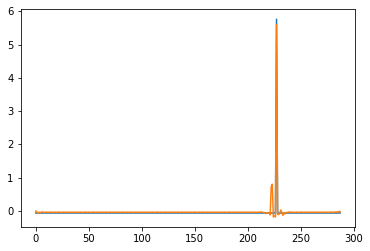

----------------------------------------
Getting KPI x Host data
Running detection for  os_022 CPU_idle_pct
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 Disk_await
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 Disk_avgqu_sz
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 Processor_load_5_min
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 Processor_load_1_min
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 Disk_io_util
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  os_022 Processor_load_15_min
Checking for anomalies
----------------------------------------
Getting KPI x Host

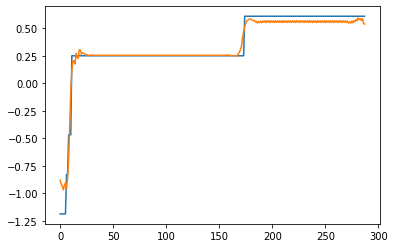

----------------------------------------
Getting KPI x Host data
Running detection for  docker_001 container_thread_running
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_001 container_thread_idle
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_001 container_fgct
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_001 container_thread_total
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_001 container_thread_used_pct
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_001 container_session_used
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_001 container_fgc
Checking for anomalie

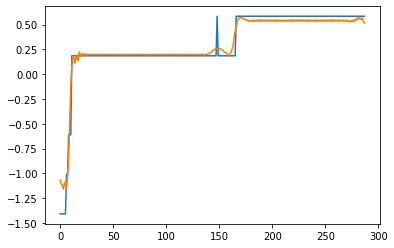

----------------------------------------
Getting KPI x Host data
Running detection for  docker_002 container_thread_used_pct
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_002 container_thread_running
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_002 container_cpu_used
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_002 container_fgct
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_002 container_thread_total
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_002 container_session_used
Checking for anomalies
----------------------------------------
Getting KPI x Host data
Running detection for  docker_002 container_thread_idle
Checking for ano

In [49]:
for host in ['os_021','os_022','docker_001','docker_002']:
    problems = find_anom(host, pp.load_dfs(data_path))

problems

In [29]:
problems
        

[('docker_004', 'container_mem_used')]